In [99]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'SLU_Opportunity_Wise_Data.csv')
# Initial exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nBasic info:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe(include='all'))
print("\nMissing values:")
print(df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Dataset shape: (8262, 100)

First 5 rows:
  Learner SignUp DateTime                  Opportunity Id  \
0     2023-06-14 12:30:35  00000000-0GN2-A0AY-7XK8-C5FZPP   
1     2023-05-01 05:29:16  00000000-0GN2-A0AY-7XK8-C5FZPP   
2     2023-04-09 20:35:08  00000000-0GN2-A0AY-7XK8-C5FZPP   
3     2023-08-29 05:20:03  00000000-0GN2-A0AY-7XK8-C5FZPP   
4     2023-01-06 15:26:36  00000000-0GN2-A0AY-7XK8-C5FZPP   

                                    Opportunity Name Opportunity End Date  \
0  Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   
1  Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   
2  Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   
3  Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   
4  Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   

         First Name Date of Birth                  Institution Name  \
0             Faria    2001-01-12                        

In [105]:
import pandas as pd

df = pd.read_csv(r'SLU_Opportunity_Wise_Data.csv')

date_columns = [
    'Learner SignUp DateTime',
    'Opportunity End Date',
    'Entry created at',
    'Apply Date',
    'Opportunity Start Date'
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df[col] = df[col].apply(
        lambda x: x.replace(hour=0, minute=0, second=0) + pd.Timedelta(days=1)
        if pd.notna(x) and x.hour == 24
        else x
    )


In [109]:
start_date_mode = df['Opportunity Start Date'].mode()[0]
df['Opportunity Start Date'] = df['Opportunity Start Date'].fillna(start_date_mode)

In [111]:
df['Institution Name'] = df['Institution Name'].str.lower().str.strip()
df['Current/Intended Major'] = df['Current/Intended Major'].str.lower().str.strip()


In [113]:
# Check duplicates count
print("Duplicate rows before dropping:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

# Confirm removal
print("Duplicate rows after dropping:", df.duplicated().sum())


Duplicate rows before dropping: 0
Duplicate rows after dropping: 0


In [115]:
print(df.isnull().sum())


Learner SignUp DateTime            0
Opportunity Id                     0
Opportunity Name                   0
Opportunity End Date            1215
First Name                         0
                                ... 
Country_Virgin Islands, U.S.       0
Country_Yemen                      0
Country_Zambia                     0
Country_Zimbabwe                   0
Engagement_Score                   0
Length: 100, dtype: int64


In [117]:
median_duration = df['Opportunity_Duration'].median()

df['Opportunity End Date'] = df['Opportunity End Date'].fillna(
    df['Opportunity Start Date'] + pd.to_timedelta(median_duration, unit='d')
)

# Check if missing values are handled
print("Missing values in 'Opportunity End Date' after fill:", df['Opportunity End Date'].isnull().sum())


Missing values in 'Opportunity End Date' after fill: 0


In [119]:
print(df.dtypes)


Learner SignUp DateTime         datetime64[ns]
Opportunity Id                          object
Opportunity Name                        object
Opportunity End Date            datetime64[ns]
First Name                              object
                                     ...      
Country_Virgin Islands, U.S.              bool
Country_Yemen                             bool
Country_Zambia                            bool
Country_Zimbabwe                          bool
Engagement_Score                       float64
Length: 100, dtype: object


In [121]:
# Columns likely good to convert to category (examples)
category_cols = [
    'Opportunity Id', 
    'Opportunity Name', 
    'First Name', 
    'Status Description', 
    'Status Code', 
    'Current/Intended Major',
    'Institution Name',
    'Gender_Female',
    'Gender_Male',
    'Gender_Other',
    # add more if relevant
]

for col in category_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')


In [123]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8262 entries, 0 to 8261
Data columns (total 100 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Learner SignUp DateTime                         8262 non-null   datetime64[ns]
 1   Opportunity Id                                  8262 non-null   category      
 2   Opportunity Name                                8262 non-null   category      
 3   Opportunity End Date                            8262 non-null   datetime64[ns]
 4   First Name                                      8262 non-null   category      
 5   Date of Birth                                   8262 non-null   object        
 6   Institution Name                                8262 non-null   category      
 7   Current/Intended Major                          8262 non-null   category      
 8   Entry created at                               

In [125]:
from datetime import datetime
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')
current_year = datetime.now().year
df['Age'] = current_year - df['Date of Birth'].dt.year


Signups per day:
 Learner SignUp DateTime
2023-01-05    145
2023-01-06      9
2023-01-07     17
2023-01-09      2
2023-01-10      5
Name: count, dtype: int64


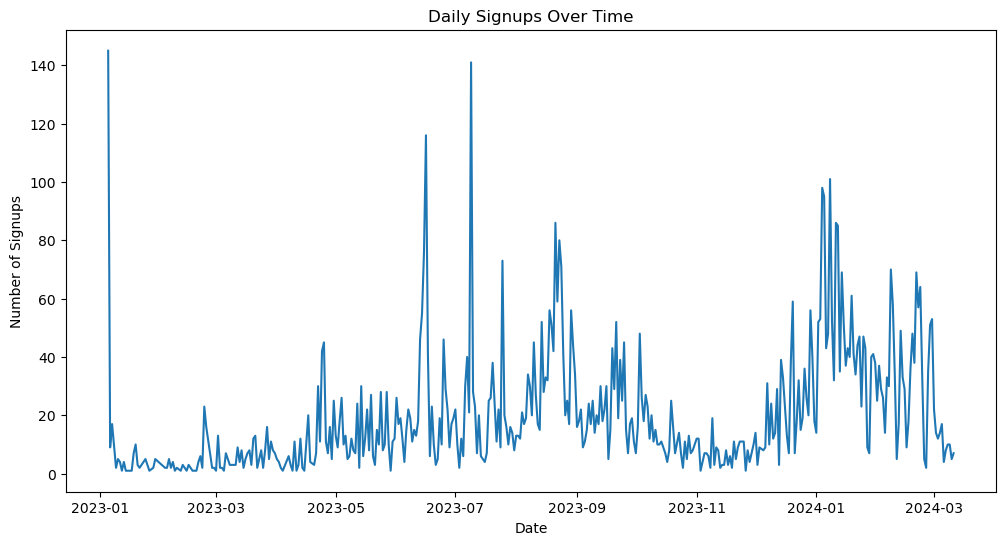

Status distribution:
 Status Description
Rejected          3443
Team Allocated    3162
Started            748
Dropped Out        596
Applied            103
Waitlisted          97
Withdraw            84
Rewards Award       29
Name: count, dtype: int64
Completion rate: 0.00%


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1.a Signups per day
signups_per_day = df['Learner SignUp DateTime'].dt.date.value_counts().sort_index()
print("Signups per day:\n", signups_per_day.head())

plt.figure(figsize=(12,6))
signups_per_day.plot(kind='line')
plt.title('Daily Signups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Signups')
plt.show()

# 1.b Completion status counts
status_counts = df['Status Description'].value_counts()
print("Status distribution:\n", status_counts)

# Completion rate (assuming 'Completed' is a status)
completed = status_counts.get('Completed', 0)
total = status_counts.sum()
completion_rate = (completed / total) * 100 if total > 0 else 0
print(f"Completion rate: {completion_rate:.2f}%")


In [129]:
status_counts = df['Status Description'].value_counts()
print("Status distribution:\n", status_counts)

completed = status_counts.get('Completed', 0)
total = status_counts.sum()
completion_rate = (completed / total) * 100 if total > 0 else 0
print(f"Completion rate: {completion_rate:.2f}%")


Status distribution:
 Status Description
Rejected          3443
Team Allocated    3162
Started            748
Dropped Out        596
Applied            103
Waitlisted          97
Withdraw            84
Rewards Award       29
Name: count, dtype: int64
Completion rate: 0.00%


In [131]:
status_counts = df['Status Description'].value_counts()

started = status_counts.get('Started', 0)
dropped_out = status_counts.get('Dropped Out', 0)
withdrawn = status_counts.get('Withdraw', 0)

# Proxy for completed = started minus those who dropped out or withdrew
proxy_completed = started - (dropped_out + withdrawn)
proxy_completed = max(proxy_completed, 0)  # just to avoid negative numbers if any

total = status_counts.sum()
completion_proxy_rate = (proxy_completed / total) * 100 if total > 0 else 0

print(f"Completion Proxy Rate: {completion_proxy_rate:.2f}%")


Completion Proxy Rate: 0.82%


                           Age  Engagement_Lag  Opportunity_Duration  \
Age                   1.000000        0.057696             -0.013326   
Engagement_Lag        0.057696        1.000000             -0.692709   
Opportunity_Duration -0.013326       -0.692709              1.000000   
Engagement_Score      0.044480        0.999998             -0.678032   
Completed             0.007396       -0.031778             -0.016030   

                      Engagement_Score  Completed  
Age                           0.044480   0.007396  
Engagement_Lag                0.999998  -0.031778  
Opportunity_Duration         -0.678032  -0.016030  
Engagement_Score              1.000000  -0.050539  
Completed                    -0.050539   1.000000  


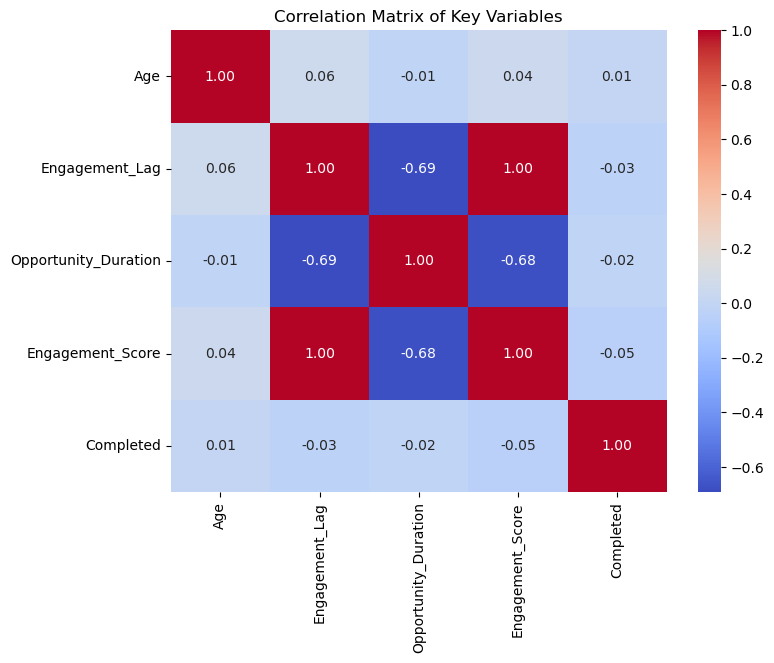

In [133]:
# Create a completion indicator based on Status Description
df['Completed'] = df['Status Description'].apply(lambda x: 1 if x == 'Rewards Award' else 0)

# Select numeric columns of interest
numeric_cols = ['Age', 'Engagement_Lag', 'Opportunity_Duration', 'Engagement_Score', 'Completed']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

print(corr_matrix)

# Optional: visualize correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Variables')
plt.show()


In [135]:
import numpy as np
from scipy import stats

numeric_cols = ['Age', 'Engagement_Lag', 'Opportunity_Duration', 'Engagement_Score']  # add your numeric columns here

for col in numeric_cols:
    # Calculate Z-scores with NaNs ignored
    z_scores = stats.zscore(df[col], nan_policy='omit')
    # Boolean mask for outliers (Z-score > 3)
    mask = np.abs(z_scores) > 3
    
    # Select outliers with aligned index using .loc
    outliers = df.loc[mask, col]
    
    print(f'\n{col} outliers (Z-score > 3):')
    print(outliers)



Age outliers (Z-score > 3):
53      41
108     42
109     40
132     44
203     42
        ..
8124    59
8171    46
8195    42
8206    45
8211    39
Name: Age, Length: 156, dtype: int32

Engagement_Lag outliers (Z-score > 3):
Series([], Name: Engagement_Lag, dtype: float64)

Opportunity_Duration outliers (Z-score > 3):
Series([], Name: Opportunity_Duration, dtype: float64)

Engagement_Score outliers (Z-score > 3):
9      -122.345711
12     -134.052530
25     -137.672984
32     -138.197984
36     -128.359348
           ...    
1347   -134.652530
1360   -127.793439
1364   -123.593439
1366   -123.859348
1371   -122.966166
Name: Engagement_Score, Length: 193, dtype: float64


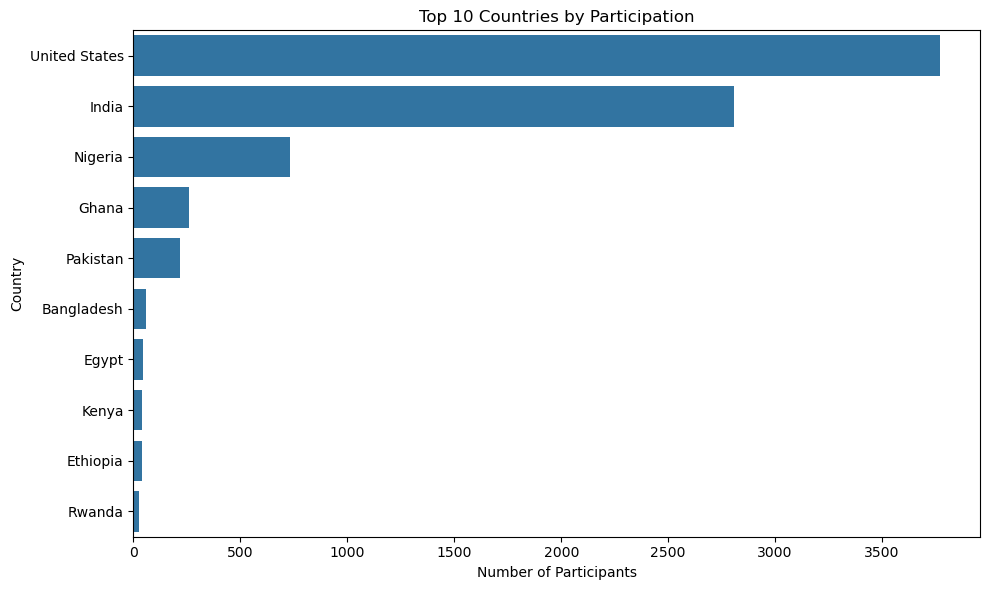

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get all one-hot encoded country columns
country_columns = [col for col in df.columns if col.startswith('Country_')]

# 2. Sum participation counts for each country
country_counts = df[country_columns].sum().sort_values(ascending=False).head(10)

# 3. Strip 'Country_' prefix for clean labels
country_names = country_counts.index.str.replace('Country_', '')

# 4. Plot without using palette (to avoid future warnings)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_names)
plt.title('Top 10 Countries by Participation')
plt.xlabel('Number of Participants')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


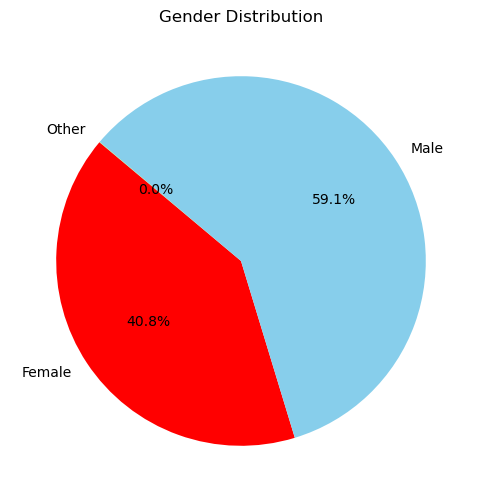

In [156]:
import matplotlib.pyplot as plt

# Gender columns (assumed one-hot encoded but possibly stored as 'category')
gender_cols = ['Gender_Female', 'Gender_Male', 'Gender_Other']

# Convert to integers if not already numeric
df[gender_cols] = df[gender_cols].astype(int)

# Sum counts for each gender
gender_counts = df[gender_cols].sum()

# Clean labels for the pie chart
labels = [col.replace('Gender_', '') for col in gender_cols]

# Colors for pie slices
colors = ['red', 'skyblue', 'lightgreen']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Gender Distribution')
plt.show()


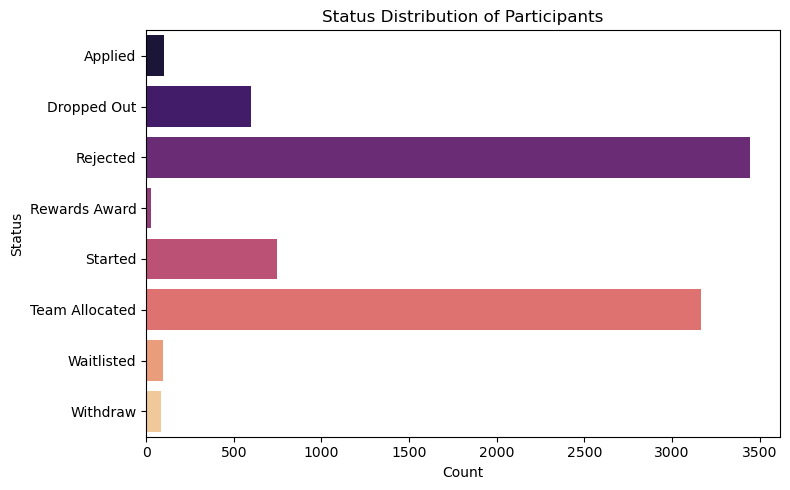

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

status_counts = df['Status Description'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=status_counts.values,
    y=status_counts.index,
    palette='magma',
    hue=status_counts.index,
    legend=False
)
plt.title('Status Distribution of Participants')
plt.xlabel('Count')
plt.ylabel('Status')
plt.tight_layout()
plt.show()


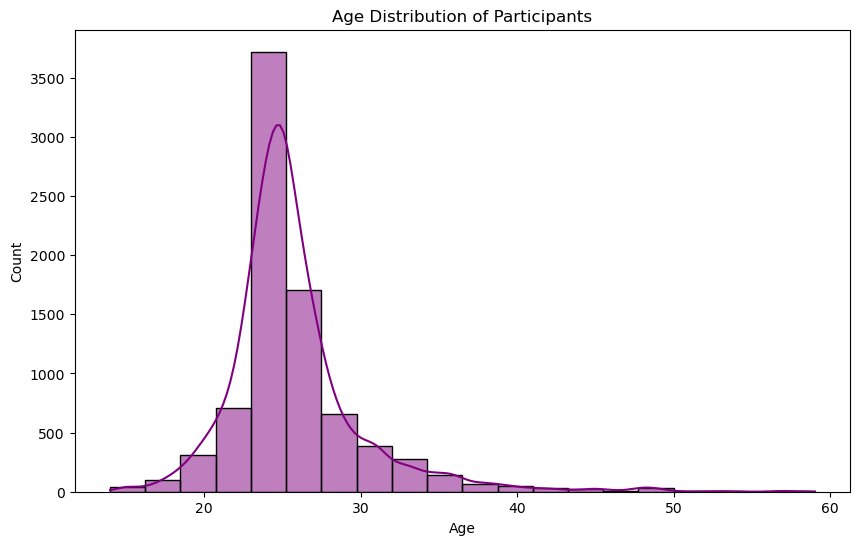

In [147]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


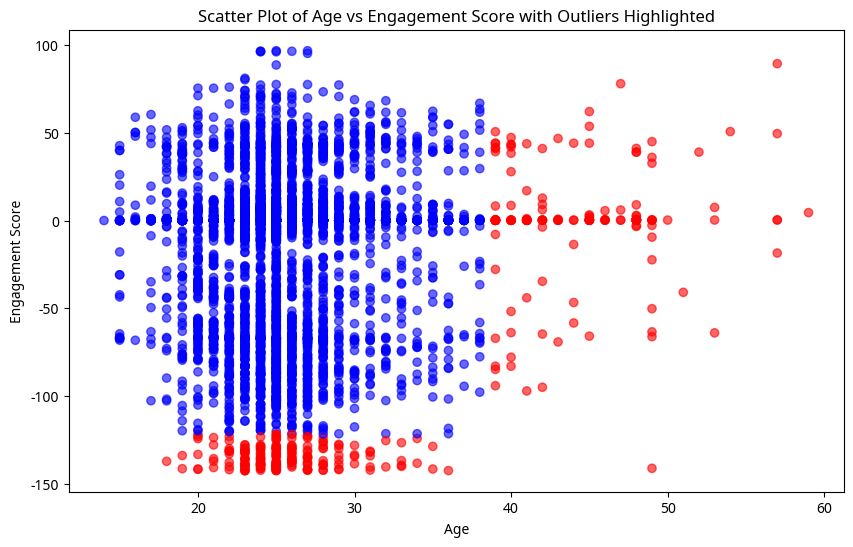

In [173]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate z-scores for Age and Engagement_Score
from scipy.stats import zscore

df['Age_z'] = zscore(df['Age'])
df['Engagement_Score_z'] = zscore(df['Engagement_Score'])

# Mark outliers for Age and Engagement_Score (|z| > 3)
outliers = (np.abs(df['Age_z']) > 3) | (np.abs(df['Engagement_Score_z']) > 3)

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Engagement_Score'], c=outliers.map({True: 'red', False: 'blue'}), alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Engagement Score')
plt.title('Scatter Plot of Age vs Engagement Score with Outliers Highlighted')
plt.show()
